# Table of Contents<a id='Table of Contents'></a>

<a href='#Obtain General Data'>**Obtain General Data**</a>

<a href='#Obtain DNA Data'>**Obtain DNA Data**</a>

<a href='#Obtain Protein Data'>**Obtain Protein Data**</a>

<a href='#dna+protein'>DNA and Protein Data Join Compatability</a>

<a href='#Obtain Sequence Data'>**Obtain Protein Sequence Data**</a>

<a href='#decision'>Decision about Chromosome to Study</a>

<a href='#api prep'>API Preperation</a>

<a href='#api pull'>API Pull</a>

<a href='#Join Data'>**Join Data**</a>

<a href='#References'>**References**</a>

<a href='#Future Work'>**Future Work**</a>

# Obtain General Data<a id='Obtain General Data'></a>

In [1]:
# read in csv dna unique identifers for this entire project
import pandas as pd
to_skip_info = []
for i in range(34,1406):
    to_skip_info.append(i)
information_about_dna_data = pd.read_csv('../data/interim/GCF_000001405.39_GRCh38.p13_assembly_report_fixed.csv', skiprows=(to_skip_info), header=0)
pd.DataFrame(information_about_dna_data['Assembly name:  GRCh38.p13'].dropna(axis=0))

,Assembly name: GRCh38.p13
1,Description: Genome Reference Consortium Hu...
3,Organism name: Homo sapiens (human)
5,Taxid: 9606
7,BioProject: PRJNA31257
9,Submitter: Genome Reference Consortium
11,Date: 2019-02-28
13,Assembly type: haploid-with-alt-loci
15,Release type: patch
17,Assembly level: Chromosome
19,Genome representation: full


<a href='#Table of Contents'>Back to Table of Contents</a>

# Obtain DNA Data<a id='Obtain DNA Data'></a>

In [2]:
# read in csv dna data to study for this project
dna_data = pd.read_csv('../data/interim/GCF_000001405.39_GRCh38.p13_assembly_report_fixed.csv', header=124)
dna_data = dna_data.dropna(axis=0)
dna_data.sample(3)

,# Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
1137,HSCHR4_6_CTG12,alt-scaffold,4,Chromosome,KI270896.1,=,NT_187650.1,ALT_REF_LOCI_2,378547.0,chr4_KI270896v1_alt
1009,HSCHR15_3_CTG8,alt-scaffold,15,Chromosome,KI270849.1,=,NT_187605.1,ALT_REF_LOCI_1,244917.0,chr15_KI270849v1_alt
47,Y,assembled-molecule,Y,Chromosome,CM000686.2,=,NC_000024.10,Primary Assembly,57227415.0,chrY


In [3]:
# check dna data datatypes
dna_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 1 to 1279
Data columns (total 10 columns):
# Sequence-Name                    640 non-null object
Sequence-Role                      640 non-null object
Assigned-Molecule                  640 non-null object
Assigned-Molecule-Location/Type    640 non-null object
GenBank-Accn                       640 non-null object
Relationship                       640 non-null object
RefSeq-Accn                        640 non-null object
Assembly-Unit                      640 non-null object
Sequence-Length                    640 non-null float64
UCSC-style-name                    640 non-null object
dtypes: float64(1), object(9)
memory usage: 55.0+ KB


In [4]:
# check length of dna dataset
len(dna_data)

640

<a href='#Table of Contents'>Back to Table of Contents</a>

# Obtain Protein Data<a id='Obtain Protein Data'></a>

In [5]:
# read csv protein data
protein_data = pd.read_csv('../data/interim/ProteinTable51_582967.csv')
protein_data.sample(3)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name
23399,2,NC_000002.12,179945129,179993341,-,57703,CWC22,NP_001362959.1,908,pre-mRNA-splicing factor CWC22 homolog isoform a
85760,14,NC_000014.9,104770341,104792643,-,207,AKT1,NP_001014432.1,480,RAC-alpha serine/threonine-protein kinase
42738,6,NC_000006.12,2765623,2785282,+,56897,WRNIP1,NP_064520.2,665,ATPase WRNIP1 isoform 1


In [6]:
# check protein data datatypes
protein_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119552 entries, 0 to 119551
Data columns (total 10 columns):
#Replicon Name        119552 non-null object
Replicon Accession    119552 non-null object
Start                 119552 non-null int64
Stop                  119552 non-null int64
Strand                119552 non-null object
GeneID                119552 non-null int64
Locus                 119552 non-null object
Protein product       119552 non-null object
Length                119552 non-null int64
Protein name          119552 non-null object
dtypes: int64(4), object(6)
memory usage: 9.1+ MB


In [7]:
# check length of protein dataset
len(protein_data)

119552

<a href='#Table of Contents'>Back to Table of Contents</a>

## DNA and Protein Data Join Compatability<a id='dna+protein'></a>

The protein and dna information is related through the RefSeq-Accn column on the dna_data table and the Replicon Accession column on the protein_data table. The two cells below show that many types of protein information is stored in chromosomes.

In [8]:
# dna data
dna_data[dna_data['RefSeq-Accn'] == 'NC_000001.11']

,# Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
1,1,assembled-molecule,1,Chromosome,CM000663.2,=,NC_000001.11,Primary Assembly,248956422.0,chr1


In [9]:
# protein data
protein_data[protein_data['Replicon Accession']== 'NC_000001.11'].sample(3)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name
10459,1,NC_000001.11,53214659,53220575,-,54987,CZIB,NP_060357.1,160,CXXC motif containing zinc binding protein iso...
11303,1,NC_000001.11,84647433,84671219,-,117178,SSX2IP,XP_016855724.1,613,afadin- and alpha-actinin-binding protein isof...
15985,1,NC_000001.11,204870823,205016539,+,23114,NFASC,XP_011507628.2,1237,neurofascin isoform X28


The protein data shown is stored in the dna data above. The dna data serves as non-unique identification for the protein data.

<a href='#Table of Contents'>Back to Table of Contents</a>

# Obtain Protien Sequence Data<a id='Obtain Sequence Data'></a>

<a href='#decision'>Jump to Decision about Chromosome to Study</a>

<a href='#api prep'>Jump to API Preperation</a>

<a href='#api pull'>Jump to API Pull</a>

In [13]:
# load api key
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/eannefawcett/.secret/ncbi_api.json")
api_key = keys['api_key']

In [14]:
# connect with server
from Bio import Entrez
Entrez.api_key = api_key
Entrez.email = 'elizabethfawcett47@gmail.com'
Entrez.tool = 'locus_by_amino_acid'
handle = Entrez.einfo()
result = handle.read()
handle.close()

<a href='#Table of Contents'>Back to Table of Contents</a>

## Decision about Chromosome to Study<a id='decision'></a>

<a href='#Protein evaluation'>Jump to Protein Evaluation</a>

<a href='#Loci evaluation'>Jump to Loci Evaluation</a>

<a href='#Chromosome evaluation'>Jump to Chromosome Evaluation</a>

<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

### Protein evaluation<a id='Protein evaluation'></a>

In [10]:
# generate dataframe that compares chromosomes to number of proteins present on chromosome
decision_about_chromosome = pd.DataFrame()
accession_numbers = dna_data['RefSeq-Accn'].unique()
number_of_proteins = []
for accession_number in accession_numbers:
    number_of_proteins.append(len(protein_data[protein_data['Replicon Accession']==accession_number]))
decision_about_chromosome['Accession Number'] = accession_numbers
decision_about_chromosome['Number of Proteins'] = number_of_proteins

In [11]:
# view chromosomes with more than 5000 proteins
decision_about_chromosome[decision_about_chromosome['Number of Proteins'] >= 5000]

,Accession Number,Number of Proteins
0,NC_000001.11,11086
1,NC_000002.12,8442
2,NC_000003.12,7198
5,NC_000006.12,5618
6,NC_000007.14,5212
9,NC_000010.11,5420
10,NC_000011.10,6710
11,NC_000012.12,5957
16,NC_000017.11,6096
18,NC_000019.10,6702


<a href='#decision'>Back to subsection Decision about Chromosome to Study</a>

<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents

### Loci evaluation<a id='Loci evaluation'></a>

In [12]:
# generate dataframe that compares loci to the number present
decision_about_locuses = pd.DataFrame()
locus_ids = protein_data['Locus'].unique()
number_of_locuses = []
for locus_id in locus_ids:
    number_of_locuses.append(len(protein_data[protein_data['Locus']==locus_id]))
decision_about_locuses['Locus'] = locus_ids
decision_about_locuses['Number of Occurances'] = number_of_locuses

In [14]:
# view loci with more than 50 occurances
locuses_of_interest = list(decision_about_locuses[decision_about_locuses['Number of Occurances'] >= 50]['Locus'])
locuses_of_interest

['ZNF311',
 'MOG',
 'DDR1',
 'LST1',
 'BAG6',
 'AGER',
 'KIR3DL2',
 'KIR2DL4',
 'KIR2DS2',
 'RBFOX2',
 'KIR2DS4',
 'FCAR',
 'NCR1',
 'OSCAR',
 'RPS9',
 'NLRP2',
 'HNRNPH1',
 'TPK1',
 'CACNA1C',
 'TNNT3',
 'PEX5',
 'EIF4G3',
 'EPB41',
 'SGIP1',
 'PDE4DIP',
 'ESRRG',
 'DTNB',
 'MAP4K4',
 'GTDC1',
 'ABI2',
 'MAP2',
 'TRIP12',
 'CLASP2',
 'ARPP21',
 'LRRFIP2',
 'PBRM1',
 'SLMAP',
 'PXK',
 'CADPS',
 'ABI3BP',
 'NEK11',
 'ZBTB38',
 'MBNL1',
 'MAPK10',
 'ANK2',
 'SORBS2',
 'RIMS1',
 'SNAP91',
 'SUN1',
 'COA1',
 'NRCAM',
 'PCM1',
 'ST18',
 'ASPH',
 'RIMS2',
 'CYRIB',
 'PTK2',
 'PTPRD',
 'CELF2',
 'CCDC7',
 'CREM',
 'PTPN20',
 'ANK3',
 'CAMK2G',
 'KCNMA1',
 'SORBS1',
 'NT5C2',
 'ABLIM1',
 'NUCB2',
 'PAX6',
 'PHF21A',
 'ATG13',
 'MADD',
 'CELF1',
 'PPP6R3',
 'DLG2',
 'CAPRIN2',
 'R3HDM2',
 'PPFIA2',
 'VEZT',
 'ANKS1B',
 'RGS6',
 'WDR20',
 'RBFOX1',
 'ADGRG1',
 'EPB41L3',
 'CELF4',
 'MBD1',
 'TCF4',
 'CARD8',
 'TANGO2',
 'ASCC2',
 'PPP6R2',
 'UTY']

In [15]:
# number of loci with greater than 50 occurances
len(locuses_of_interest)

94

In [16]:
# generate list of accession numbers for protein data that include these loci with greater than 50 occurances
proteins_for_locuses_of_interest = []
for i in locuses_of_interest:
    for j, k in enumerate(protein_data['Locus']):
        if i == k:
            proteins_for_locuses_of_interest.append(protein_data.loc[j, 'Replicon Accession'])
pd.Series(proteins_for_locuses_of_interest).value_counts()

NC_000003.12      615
NC_000010.11      593
NC_000011.10      581
NC_000002.12      411
NC_000008.11      407
                 ... 
NW_016107310.1      5
NT_187641.1         4
NT_187672.1         2
NW_016107308.1      2
NW_016107303.1      2
Length: 80, dtype: int64

In [17]:
# number of accession numbers from protein data
len(proteins_for_locuses_of_interest)

5983

In [18]:
# see unique accession numbers from protein data
proteins_of_interest = pd.DataFrame()
proteins_of_interest['Proteins'] = proteins_for_locuses_of_interest
proteins_of_interest['Proteins'].unique()

array(['NT_113891.3', 'NT_167244.2', 'NT_167245.2', 'NT_167246.2',
       'NT_167248.2', 'NT_167249.2', 'NC_000006.12', 'NT_167247.2',
       'NT_113949.2', 'NT_187636.1', 'NT_187637.1', 'NT_187638.1',
       'NT_187639.1', 'NT_187640.1', 'NT_187641.1', 'NT_187642.1',
       'NT_187643.1', 'NT_187644.1', 'NT_187645.1', 'NT_187668.1',
       'NT_187669.1', 'NT_187670.1', 'NT_187671.1', 'NT_187673.1',
       'NT_187674.1', 'NT_187675.1', 'NT_187676.1', 'NT_187677.1',
       'NT_187683.1', 'NT_187684.1', 'NT_187685.1', 'NT_187686.1',
       'NT_187687.1', 'NT_187693.1', 'NW_003571055.2', 'NW_003571056.2',
       'NW_003571057.2', 'NW_003571058.2', 'NW_003571059.2',
       'NW_003571060.1', 'NW_016107300.1', 'NW_016107301.1',
       'NW_016107302.1', 'NW_016107303.1', 'NW_016107304.1',
       'NW_016107305.1', 'NW_016107306.1', 'NW_016107307.1',
       'NW_016107308.1', 'NW_016107309.1', 'NW_016107310.1',
       'NW_016107312.1', 'NW_016107313.1', 'NW_016107314.1',
       'NC_000019.10', '

In [19]:
decision_about_locuses.head()

,Locus,Number of Occurances
0,GPX6,2
1,GPX5,4
2,ZBED9,9
3,TRIM27,7
4,ZNF311,50


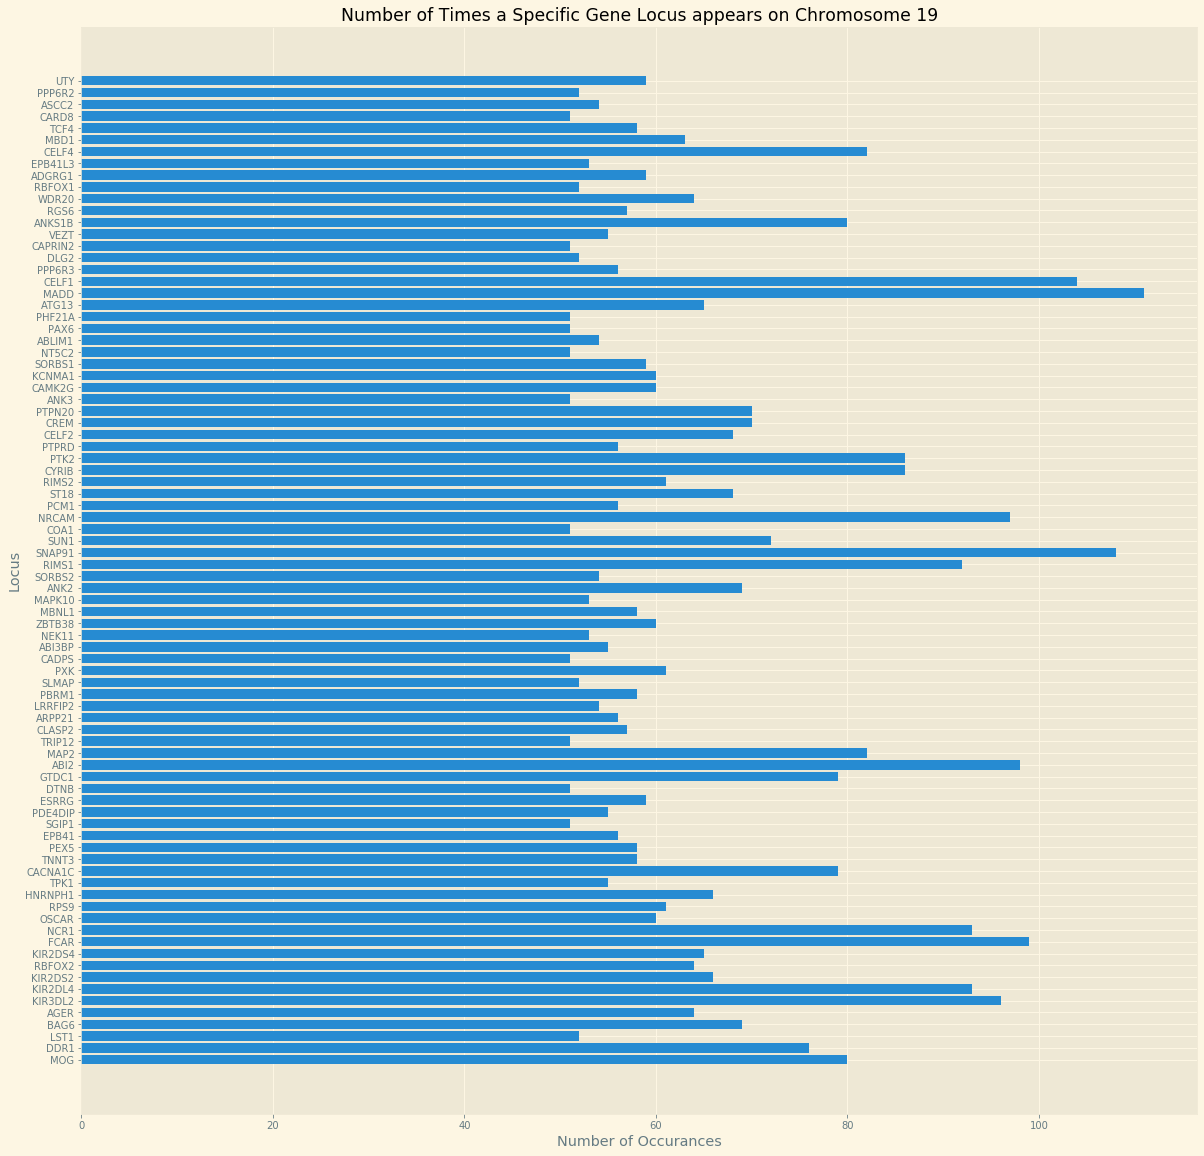

In [23]:
import matplotlib.pyplot as plt
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(figsize=(20,20))
    ax.barh(y=decision_about_locuses[decision_about_locuses['Number of Occurances']> 50]['Locus'], 
            width=decision_about_locuses[decision_about_locuses['Number of Occurances'] > 50]['Number of Occurances'])
    ax.set_xlabel('Number of Occurances', size='x-large')
    ax.set_ylabel('Locus', size='x-large')
    ax.set_title('Number of Times a Specific Gene Locus appears on Chromosome 19', size='xx-large')
    plt.savefig('../reports/figures/Number of Times a Specific Gene Locus appears on Chromosome 19');

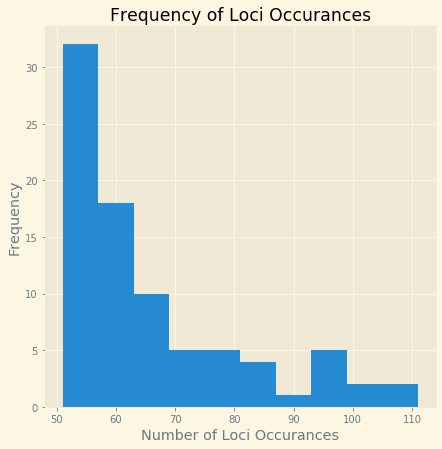

In [21]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.hist(x=decision_about_locuses[decision_about_locuses['Number of Occurances'] > 50]['Number of Occurances'])
    ax.set_xlabel('Number of Loci Occurances', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title('Frequency of Loci Occurances', size='xx-large')
#     plt.savefig('../reports/figures/...');

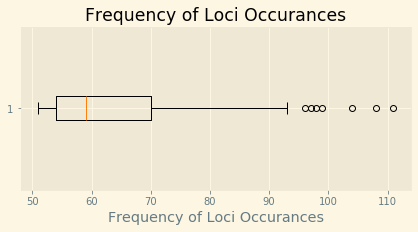

In [22]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(figsize=(7,3))
    ax.boxplot(x=decision_about_locuses[decision_about_locuses['Number of Occurances'] > 50]['Number of Occurances'], vert=False)
    ax.set_xlabel('Frequency of Loci Occurances', size='x-large')
    ax.set_title('Frequency of Loci Occurances', size='xx-large')
#     plt.savefig('../reports/figures/Number of Times a Specific Gene Locus appears on Chromosome 19');

<a href='#decision'>Back to subsection Decision about Chromosome to Study</a>

<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents

### Chromosome evaluation<a id='Chromosome evaluation'></a>

In [24]:
# see chromosome for unique accession numbers from protein data
proteins_of_interest_list = proteins_of_interest['Proteins'].unique()
chromosomes = []
for protein in proteins_of_interest_list:
    for j, k in enumerate(dna_data['RefSeq-Accn']):
        if protein == k:
            chromosomes.append(dna_data.loc[dna_data[dna_data['RefSeq-Accn']==k].index[0], 'Assigned-Molecule'])
pd.Series(chromosomes).value_counts()

19    48
6      8
12     3
11     2
5      2
22     2
7      2
Y      1
16     1
3      1
1      1
9      1
2      1
8      1
18     1
4      1
14     1
10     1
dtype: int64

In [ ]:
# get information about decision_about_locuses[decision_about_locuses['Number of Occurances']> 50]['Locus'])[11]

<img src='../references/chromosome 19 loci focus function.png' alt='chromosome 19 loci focus function'>

<a href='#decision'>Back to subsection Decision about Chromosome to Study</a>

<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents

## API Preperation<a id='api prep'></a>

In [25]:
# pull dna data for chromosome 19
selected_dna_data = dna_data[dna_data['Assigned-Molecule'] == pd.Series(chromosomes).value_counts().index[0]]
selected_dna_data.sample(3)

,# Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
681,HG2021_PATCH,fix-patch,19,Chromosome,KN196484.1,=,NW_009646206.1,PATCHES,370917.0,na
1271,HSCHR19KIR_FH13_BA2_HAP_CTG3_1,alt-scaffold,19,Chromosome,KI270932.1,=,NT_187686.1,ALT_REF_LOCI_33,215732.0,chr19_KI270932v1_alt
1081,HSCHR19_4_CTG2,alt-scaffold,19,Chromosome,KI270865.1,=,NT_187621.1,ALT_REF_LOCI_1,52969.0,chr19_KI270865v1_alt


In [26]:
# pull protein data for chromosome 19
selected_accession_numbers = selected_dna_data['RefSeq-Accn']
selected_protein_dataframes = []
for accession_number in selected_accession_numbers:
    selected_protein_dataframes.append(protein_data[protein_data['Replicon Accession'] == accession_number])
selected_protein_dataframes[0:3]

[       #Replicon Name Replicon Accession     Start      Stop Strand  GeneID  \
 102114             19       NC_000019.10    110679    111596      +   81099   
 102115             19       NC_000019.10    281388    291336      -    8612   
 102116             19       NC_000019.10    281388    291066      -    8612   
 102117             19       NC_000019.10    281388    288055      -    8612   
 102118             19       NC_000019.10    281388    291336      -    8612   
 ...               ...                ...       ...       ...    ...     ...   
 108811             19       NC_000019.10  58562072  58572632      -    7593   
 108812             19       NC_000019.10  58562072  58573296      -    7593   
 108813             19       NC_000019.10  58562072  58571389      -    7593   
 108814             19       NC_000019.10  58562072  58563424      -    7593   
 108815             19       NC_000019.10  58563160  58571389      -    7593   
 
          Locus Protein product  Lengt

In [27]:
# stitch together selected protein data after data evaluation
selected_protein_data = pd.concat(selected_protein_dataframes)
selected_protein_data.head()

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name
102114,19,NC_000019.10,110679,111596,+,81099,OR4F17,NP_001005240.1,305,olfactory receptor 4F17
102115,19,NC_000019.10,281388,291336,-,8612,PLPP2,XP_011526698.1,294,phospholipid phosphatase 2 isoform X1
102116,19,NC_000019.10,281388,291066,-,8612,PLPP2,NP_808211.1,309,phospholipid phosphatase 2 isoform 3
102117,19,NC_000019.10,281388,288055,-,8612,PLPP2,NP_803545.1,232,phospholipid phosphatase 2 isoform 2
102118,19,NC_000019.10,281388,291336,-,8612,PLPP2,NP_003703.1,288,phospholipid phosphatase 2 isoform 1


In [28]:
# check to see if this will be enough data to study
proteins_to_study = []
for protein in selected_protein_dataframes:
    for j in protein['Protein product']:
        proteins_to_study.append(j)
len(proteins_to_study)

7981

In [33]:
len(selected_protein_data['Locus'].unique())

1414

In [29]:
# preparing batches to contact database
batch_01 = proteins_to_study[0:200]
batch_02 = proteins_to_study[200:400]
batch_03 = proteins_to_study[400:600]
batch_04 = proteins_to_study[600:800]
batch_05 = proteins_to_study[800:1000]
batch_06 = proteins_to_study[1000:1200]
batch_07 = proteins_to_study[1200:1400]
batch_08 = proteins_to_study[1400:1600]
batch_09 = proteins_to_study[1600:1800]
batch_10 = proteins_to_study[1800:2000]
batch_11 = proteins_to_study[2000:2200]
batch_12 = proteins_to_study[2200:2400]
batch_13 = proteins_to_study[2400:2600]
batch_14 = proteins_to_study[2600:2800]
batch_15 = proteins_to_study[2800:3000]
batch_16 = proteins_to_study[3000:3200]
batch_17 = proteins_to_study[3200:3400]
batch_18 = proteins_to_study[3400:3600]
batch_19 = proteins_to_study[3600:3800]
batch_20 = proteins_to_study[3800:4000]
batch_21 = proteins_to_study[4000:4200]
batch_22 = proteins_to_study[4200:4400]
batch_23 = proteins_to_study[4400:4600]
batch_24 = proteins_to_study[4600:4800]
batch_25 = proteins_to_study[4800:5000]
batch_26 = proteins_to_study[5000:5200]
batch_27 = proteins_to_study[5200:5400]
batch_28 = proteins_to_study[5400:5600]
batch_29 = proteins_to_study[5600:5800]
batch_30 = proteins_to_study[5800:6000]
batch_31 = proteins_to_study[6000:6200]
batch_32 = proteins_to_study[6200:6400]
batch_33 = proteins_to_study[6400:6600]
batch_34 = proteins_to_study[6600:6800]
batch_35 = proteins_to_study[6800:7000]
batch_36 = proteins_to_study[7000:7200]
batch_37 = proteins_to_study[7200:7400]
batch_38 = proteins_to_study[7400:7600]
batch_39 = proteins_to_study[7600:7800]
batch_40 = proteins_to_study[7800:7982]

In [30]:
# list of batches prepared
batches = [batch_01, batch_02, batch_03, batch_04, batch_05, batch_06, batch_07, batch_08, batch_09,
           batch_10, batch_11, batch_12, batch_13, batch_14, batch_15, batch_16, batch_17, batch_18,
           batch_19, batch_20, batch_21, batch_22, batch_23, batch_24, batch_25, batch_26, batch_27,
           batch_28, batch_29, batch_30, batch_31, batch_32, batch_33, batch_34, batch_35, batch_36,
           batch_37, batch_38, batch_39, batch_40]

<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents

## API Pull<a id='api pull'></a>

In [31]:
# function to contact database
def get_ncbi_data(api, email, tool, database, ids):
    """To get data from the ncbi blast data base given: 
    an API key, 
    an email, must be on file with ncbi, 
    a tool, must be on file with ncbi, 
    the database name to search, and 
    the ids to search by in list format."""
    from Bio import Entrez
    import time
    Entrez.api_key = api
    Entrez.email = email
    Entrez.tool = tool
    print('Searching')
    time.sleep(10)
    search_results = Entrez.read(Entrez.epost(database, id=",".join(ids)))
    time.sleep(1)
    webenv = search_results["WebEnv"]
    query_key = search_results["QueryKey"]
    print('Fetching Results')
    results = Entrez.read(Entrez.efetch(db=database, webenv=webenv, query_key=query_key, retmode='xml'))
    protein_additional_data = pd.DataFrame()
    accession_version = []
    definition = []
    division = []
    topology = []
    moltype = []
    organism = []
    sequence = []
    chromosome = []
    molar_weight = []
    regions = []
    sites = []
    print('Parsing Results')
    for i in results:
        region = 0
        site = 0
        accession_version.append(i['GBSeq_accession-version'])
        organism.append(i['GBSeq_organism'])
        definition.append(i['GBSeq_definition'])
        division.append(i['GBSeq_division'])
        topology.append(i['GBSeq_topology'])
        moltype.append(i['GBSeq_moltype'])
        sequence.append(i['GBSeq_sequence'])
        if i['GBSeq_feature-table'][0]['GBFeature_key'] == 'source':
            chromosome.append(i['GBSeq_feature-table'][0]['GBFeature_quals'][2]['GBQualifier_value'])
        else:
            continue
        if i['GBSeq_feature-table'][1]['GBFeature_key'] == 'Protein':
            if i['GBSeq_feature-table'][1]['GBFeature_quals'][0]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][0]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][1]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][1]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][2]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][2]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][3]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][3]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][4]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][4]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][5]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][5]['GBQualifier_value'])
            elif i['GBSeq_feature-table'][1]['GBFeature_quals'][6]['GBQualifier_name'] == 'calculated_mol_wt':
                molar_weight.append(i['GBSeq_feature-table'][1]['GBFeature_quals'][6]['GBQualifier_value'])
            else:
                print('add more elif statements')
        else:
            continue
        for j in range(0, len(i['GBSeq_feature-table'])):
            if i['GBSeq_feature-table'][j]['GBFeature_key'] == 'Region':
                region += 1
            else:
                continue
        for j in range(0, len(i['GBSeq_feature-table'])):
            if i['GBSeq_feature-table'][j]['GBFeature_key'] == 'Site':
                site += 1
            else:
                continue
        regions.append(region)
        sites.append(site)
    protein_additional_data['Chromosome'] = chromosome
    protein_additional_data['Accession Version'] = accession_version
    protein_additional_data['Organism'] = organism
    protein_additional_data['Definition'] = definition
    protein_additional_data['Division'] = division
    protein_additional_data['Topology'] = topology
    protein_additional_data['Molecule Type'] = moltype
    protein_additional_data['Molecular Weight'] = molar_weight
    protein_additional_data['Number of Regions'] = regions
    protein_additional_data['Number of Binding Sites'] = sites
    protein_additional_data['Sequence'] = sequence
    time.sleep(10)
    print('Finished')
    return protein_additional_data

In [32]:
# contact database using api
email = 'elizabethfawcett47@gmail.com'
tool = 'locus_by_amino_acid'
protein_additional_dataframes = []
for batch in batches:
    protein_additional_dataframes.append(get_ncbi_data(api_key, email, tool, 'protein', batch))

Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fetching Results
Parsing Results
Finished
Searching
Fe

In [33]:
# check random additional protein dataframe to see if sequence was captured
protein_additional_dataframes[39].head()

,Chromosome,Accession Version,Organism,Definition,Division,Topology,Molecule Type,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
0,19,NP_579805.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform c pre...,PRI,linear,AA,19367,1,0,mdpkqttllclvlclgqriqaqegdfpmpfisaksspvipldgsvk...
1,19,NP_579806.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform d [Ho...,PRI,linear,AA,30794,2,2,mdpkqttllclgdfpmpfisaksspvipldgsvkiqcqaireaylt...
2,19,NP_579812.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform h [Ho...,PRI,linear,AA,28212,2,0,mdpkqttllclgdfpmpfisaksspvipldgsvkiqcqaireaylt...
3,19,NP_579807.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform e [Ho...,PRI,linear,AA,20223,1,0,mdpkqttllclgdfpmpfisaksspvipldgsvkiqcqaireaylt...
4,19,NP_579811.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform g [Ho...,PRI,linear,AA,19462,1,2,mdpkqttllclglygkpflsadrglvlmpgenisltcssahipfdr...


In [35]:
# stitch together additional protein data after sequence capture
protein_additional_data = pd.concat(protein_additional_dataframes)
protein_additional_data.head()

,Chromosome,Accession Version,Organism,Definition,Division,Topology,Molecule Type,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
0,19,NP_001005240.1,Homo sapiens,olfactory receptor 4F17 [Homo sapiens],PRI,linear,AA,34081,2,7,mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsds...
1,19,XP_011526698.1,Homo sapiens,phospholipid phosphatase 2 isoform X1 [Homo sa...,PRI,linear,AA,33015,1,1,mqrrwvfvlldvlcllvgfssppaslpfailtlvnapykrgfycgd...
2,19,NP_808211.1,Homo sapiens,phospholipid phosphatase 2 isoform 3 [Homo sap...,PRI,linear,AA,34262,1,1,mgvargpgsrgqhppprqqevcaegprarlhpappglgaslpfail...
3,19,NP_803545.1,Homo sapiens,phospholipid phosphatase 2 isoform 2 [Homo sap...,PRI,linear,AA,25972,1,1,magvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtf...
4,19,NP_003703.1,Homo sapiens,phospholipid phosphatase 2 isoform 1 [Homo sap...,PRI,linear,AA,32443,1,8,mqrrwvfvlldvlcllvaslpfailtlvnapykrgfycgddsiryp...


<a href='#Obtain Sequence Data'>Back to section Obtain Protein Sequence Data</a>

<a href='#Table of Contents'>Back to Table of Contents

# Join Data<a id='Join Data'></a>

In [36]:
# selected dna data check
selected_dna_data.head()

,# Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
37,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19
681,HG2021_PATCH,fix-patch,19,Chromosome,KN196484.1,=,NW_009646206.1,PATCHES,370917.0,na
683,HG26_PATCH,fix-patch,19,Chromosome,KQ458386.1,=,NW_014040929.1,PATCHES,405389.0,na
685,HG109_PATCH,fix-patch,19,Chromosome,ML143376.1,=,NW_021160022.1,PATCHES,493165.0,na
687,HSCHR19KIR_0019-4656-A_CTG3_1,novel-patch,19,Chromosome,KV575246.1,=,NW_016107300.1,PATCHES,163926.0,na


In [37]:
# selected protein data check
selected_protein_data.head()

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name
102114,19,NC_000019.10,110679,111596,+,81099,OR4F17,NP_001005240.1,305,olfactory receptor 4F17
102115,19,NC_000019.10,281388,291336,-,8612,PLPP2,XP_011526698.1,294,phospholipid phosphatase 2 isoform X1
102116,19,NC_000019.10,281388,291066,-,8612,PLPP2,NP_808211.1,309,phospholipid phosphatase 2 isoform 3
102117,19,NC_000019.10,281388,288055,-,8612,PLPP2,NP_803545.1,232,phospholipid phosphatase 2 isoform 2
102118,19,NC_000019.10,281388,291336,-,8612,PLPP2,NP_003703.1,288,phospholipid phosphatase 2 isoform 1


In [38]:
# selected dna data join to selected protein data
selected_dna_data.index = selected_dna_data['RefSeq-Accn']
dna_plus_protein = selected_protein_data.join(selected_dna_data, on='Replicon Accession', how='inner')
dna_plus_protein.head()

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,Sequence-Role,Assigned-Molecule,Assigned-Molecule-Location/Type,GenBank-Accn,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name
102114,19,NC_000019.10,110679,111596,+,81099,OR4F17,NP_001005240.1,305,olfactory receptor 4F17,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19
102115,19,NC_000019.10,281388,291336,-,8612,PLPP2,XP_011526698.1,294,phospholipid phosphatase 2 isoform X1,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19
102116,19,NC_000019.10,281388,291066,-,8612,PLPP2,NP_808211.1,309,phospholipid phosphatase 2 isoform 3,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19
102117,19,NC_000019.10,281388,288055,-,8612,PLPP2,NP_803545.1,232,phospholipid phosphatase 2 isoform 2,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19
102118,19,NC_000019.10,281388,291336,-,8612,PLPP2,NP_003703.1,288,phospholipid phosphatase 2 isoform 1,19,assembled-molecule,19,Chromosome,CM000681.2,=,NC_000019.10,Primary Assembly,58617616.0,chr19


In [39]:
# additional protein data join
protein_additional_data.index = protein_additional_data['Accession Version']
all_data = dna_plus_protein.join(protein_additional_data, on='Protein product', how='inner')
all_data.sample(10)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,...,Accession Version,Organism,Definition,Division,Topology,Molecule Type,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
4366,Un,NW_003571055.2,176167,182557,+,6203,RPS9,NP_001308630.1,194,40S ribosomal protein S9 isoform a,...,NP_001308630.1,Homo sapiens,40S ribosomal protein S9 isoform a [Homo sapiens],PRI,linear,AA,22460,1,5,mpvarswvcrktyvtprrpfeksrldqelkligeyglrnkrevwrv...
3802,Un,NT_187684.1,86773,100740,-,3802,KIR2DL1,NP_055033.2,348,killer cell immunoglobulin-like receptor 2DL1 ...,...,NP_055033.2,Homo sapiens,killer cell immunoglobulin-like receptor 2DL1 ...,PRI,linear,AA,36328,3,5,msllvvsmacvgffllqgawphegvhrkpsllahpgrlvkseetvi...
108209,19,NC_000019.10,54850476,54866731,+,3812,KIR3DL2,NP_001229796.1,438,killer cell immunoglobulin-like receptor 3DL2 ...,...,NP_001229796.1,Homo sapiens,killer cell immunoglobulin-like receptor 3DL2 ...,PRI,linear,AA,46277,4,4,msltvvsmacvgffllqgawplmggqdkpflsarpstvvprgghva...
108006,19,NC_000019.10,53794049,53811241,-,91662,NLRP12,XP_016882954.1,923,"NACHT, LRR and PYD domains-containing protein ...",...,XP_016882954.1,Homo sapiens,"NACHT, LRR and PYD domains-containing protein ...",PRI,linear,AA,104290,0,0,medrnarlgecvnlshrytrlllvkehsnpmqvqqqlldtgrghar...
3715,Un,NT_187676.1,150240,165813,+,2204,FCAR,NP_579805.1,191,immunoglobulin alpha Fc receptor isoform c pre...,...,NP_579805.1,Homo sapiens,immunoglobulin alpha Fc receptor isoform c pre...,PRI,linear,AA,19367,1,0,mdpkqttllclvlclgqriqaqegdfpmpfisaksspvipldgsvk...
4515,Un,NW_003571057.2,176167,182557,+,6203,RPS9,NP_001004.2,194,40S ribosomal protein S9 isoform a,...,NP_001004.2,Homo sapiens,40S ribosomal protein S9 isoform a [Homo sapiens],PRI,linear,AA,22460,1,5,mpvarswvcrktyvtprrpfeksrldqelkligeyglrnkrevwrv...
5653,Un,NW_016107310.1,42307,56254,+,3803,KIR2DL2,NP_055034.2,348,killer cell immunoglobulin-like receptor 2DL2 ...,...,NP_055034.2,Homo sapiens,killer cell immunoglobulin-like receptor 2DL2 ...,PRI,linear,AA,36221,2,6,mslmvvsmacvgffllqgawphegvhrkpsllahpgrlvkseetvi...
103873,19,NC_000019.10,13751809,13763068,+,81576,CCDC130,XP_005260143.1,396,coiled-coil domain-containing protein 130 isof...,...,XP_005260143.1,Homo sapiens,coiled-coil domain-containing protein 130 isof...,PRI,linear,AA,44671,1,0,mgerkgvnkyyppdfnpekhgslnryhnshplrerarklsqgilii...
5664,Un,NW_016107310.1,209676,218355,+,3812,KIR3DL2,NP_006728.2,455,killer cell immunoglobulin-like receptor 3DL2 ...,...,NP_006728.2,Homo sapiens,killer cell immunoglobulin-like receptor 3DL2 ...,PRI,linear,AA,47991,3,5,msltvvsmacvgffllqgawplmggqdkpflsarpstvvprgghva...
4689,Un,NW_003571060.1,148822,163294,-,79143,MBOAT7,NP_001139528.1,399,lysophospholipid acyltransferase 7 isoform 2,...,NP_001139528.1,Homo sapiens,lysophospholipid acyltransferase 7 isoform 2 [...,PRI,linear,AA,44602,1,0,mgssrcgpgahpvhlwpphfafsghhprdlgphsgpallvslasev...


<a href='#Table of Contents'>Back to Table of Contents

# References<a id='References'></a>

Use of entrez package for online searches using api

- http://biopython.org/DIST/docs/tutorial/Tutorial.pdf 

<a href='#Table of Contents'>Back to Table of Contents

# Future Work<a id='Future Work'></a>

In [41]:
# save data for use in other notebooks
all_data.to_csv('files/all_protein_data_19.csv')

<a href='#Table of Contents'>Back to Table of Contents